In [2]:
import numpy as np
from matplotlib import pyplot as plt
M = 3

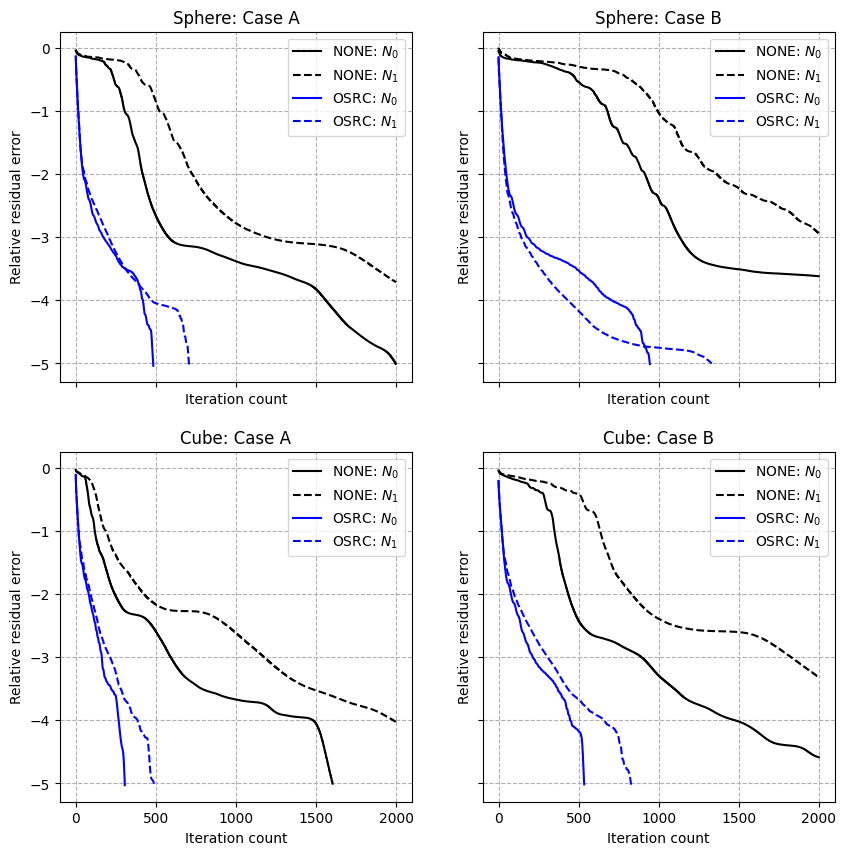

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), sharex=True, sharey=True)
solver = 'gmres'
ax = ax.ravel()
i = 0
for shape in ['sphere', 'cube']:
    for case in ['A', 'B']:    
        if shape == 'cube':
            shape_name = 'Cube'
        if shape == 'sphere':
            shape_name = 'Sphere'
            
        res0 = np.load("results/" + str(M) + case + str(10) + "mtf" + solver + 'gmres' + str(shape) +'.npy').ravel()
        res1 = np.load("results/" + str(M) + case + str(20) + "mtf" + solver + 'gmres' + str(shape) + '.npy').ravel()
    
        res0_unprec = np.load("results/" + str(M) + case + str(10) + "mtf" + solver + 'gmres_unprec' + str(shape) + '.npy').ravel()
        res1_unprec = np.load("results/" + str(M) + case + str(20) + "mtf" + solver + 'gmres_unprec' + str(shape) + '.npy').ravel()
        
        ax[i].plot(np.log10(res0_unprec), label = r'NONE: $N_0$', color = 'k')
        ax[i].plot(np.log10(res1_unprec), label = r'NONE: $N_1$', color = 'k', linestyle = '--')
        
        
        ax[i].plot(np.log10(res0), label = r'OSRC: $N_0$', color = 'b')
        ax[i].plot(np.log10(res1), label = r'OSRC: $N_1$', color = 'b', linestyle='--')
    
        ax[i].legend()
        ax[i].grid(linestyle='--')
        ax[i].set_xlabel('Iteration count')
        ax[i].set_ylabel('Relative residual error')
        ax[i].set_title(shape_name + ': Case ' + str(case))
    
        i += 1

plt.savefig('results/convergenceGmres.pdf')
plt.show()